# Importing Libraries

In [1]:
import pytesseract
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
import random
import cv2
from PIL import Image
from glob import glob

In [2]:
image_path = "./data/ABHINAV_AADHAR_compressed_page-0001.jpg"
# image_path = "./data/Commercial_Invoice_50_page-0001.jpg"
# image_path = "./data/Commercial_Invoice_52_page-0001.jpg"

image_file = Image.open(image_path)
# print(pytesseract.image_to_string(image_file))


# Generating Grid Coordinates

(-0.5, 1239.5, 1754.5, -0.5)

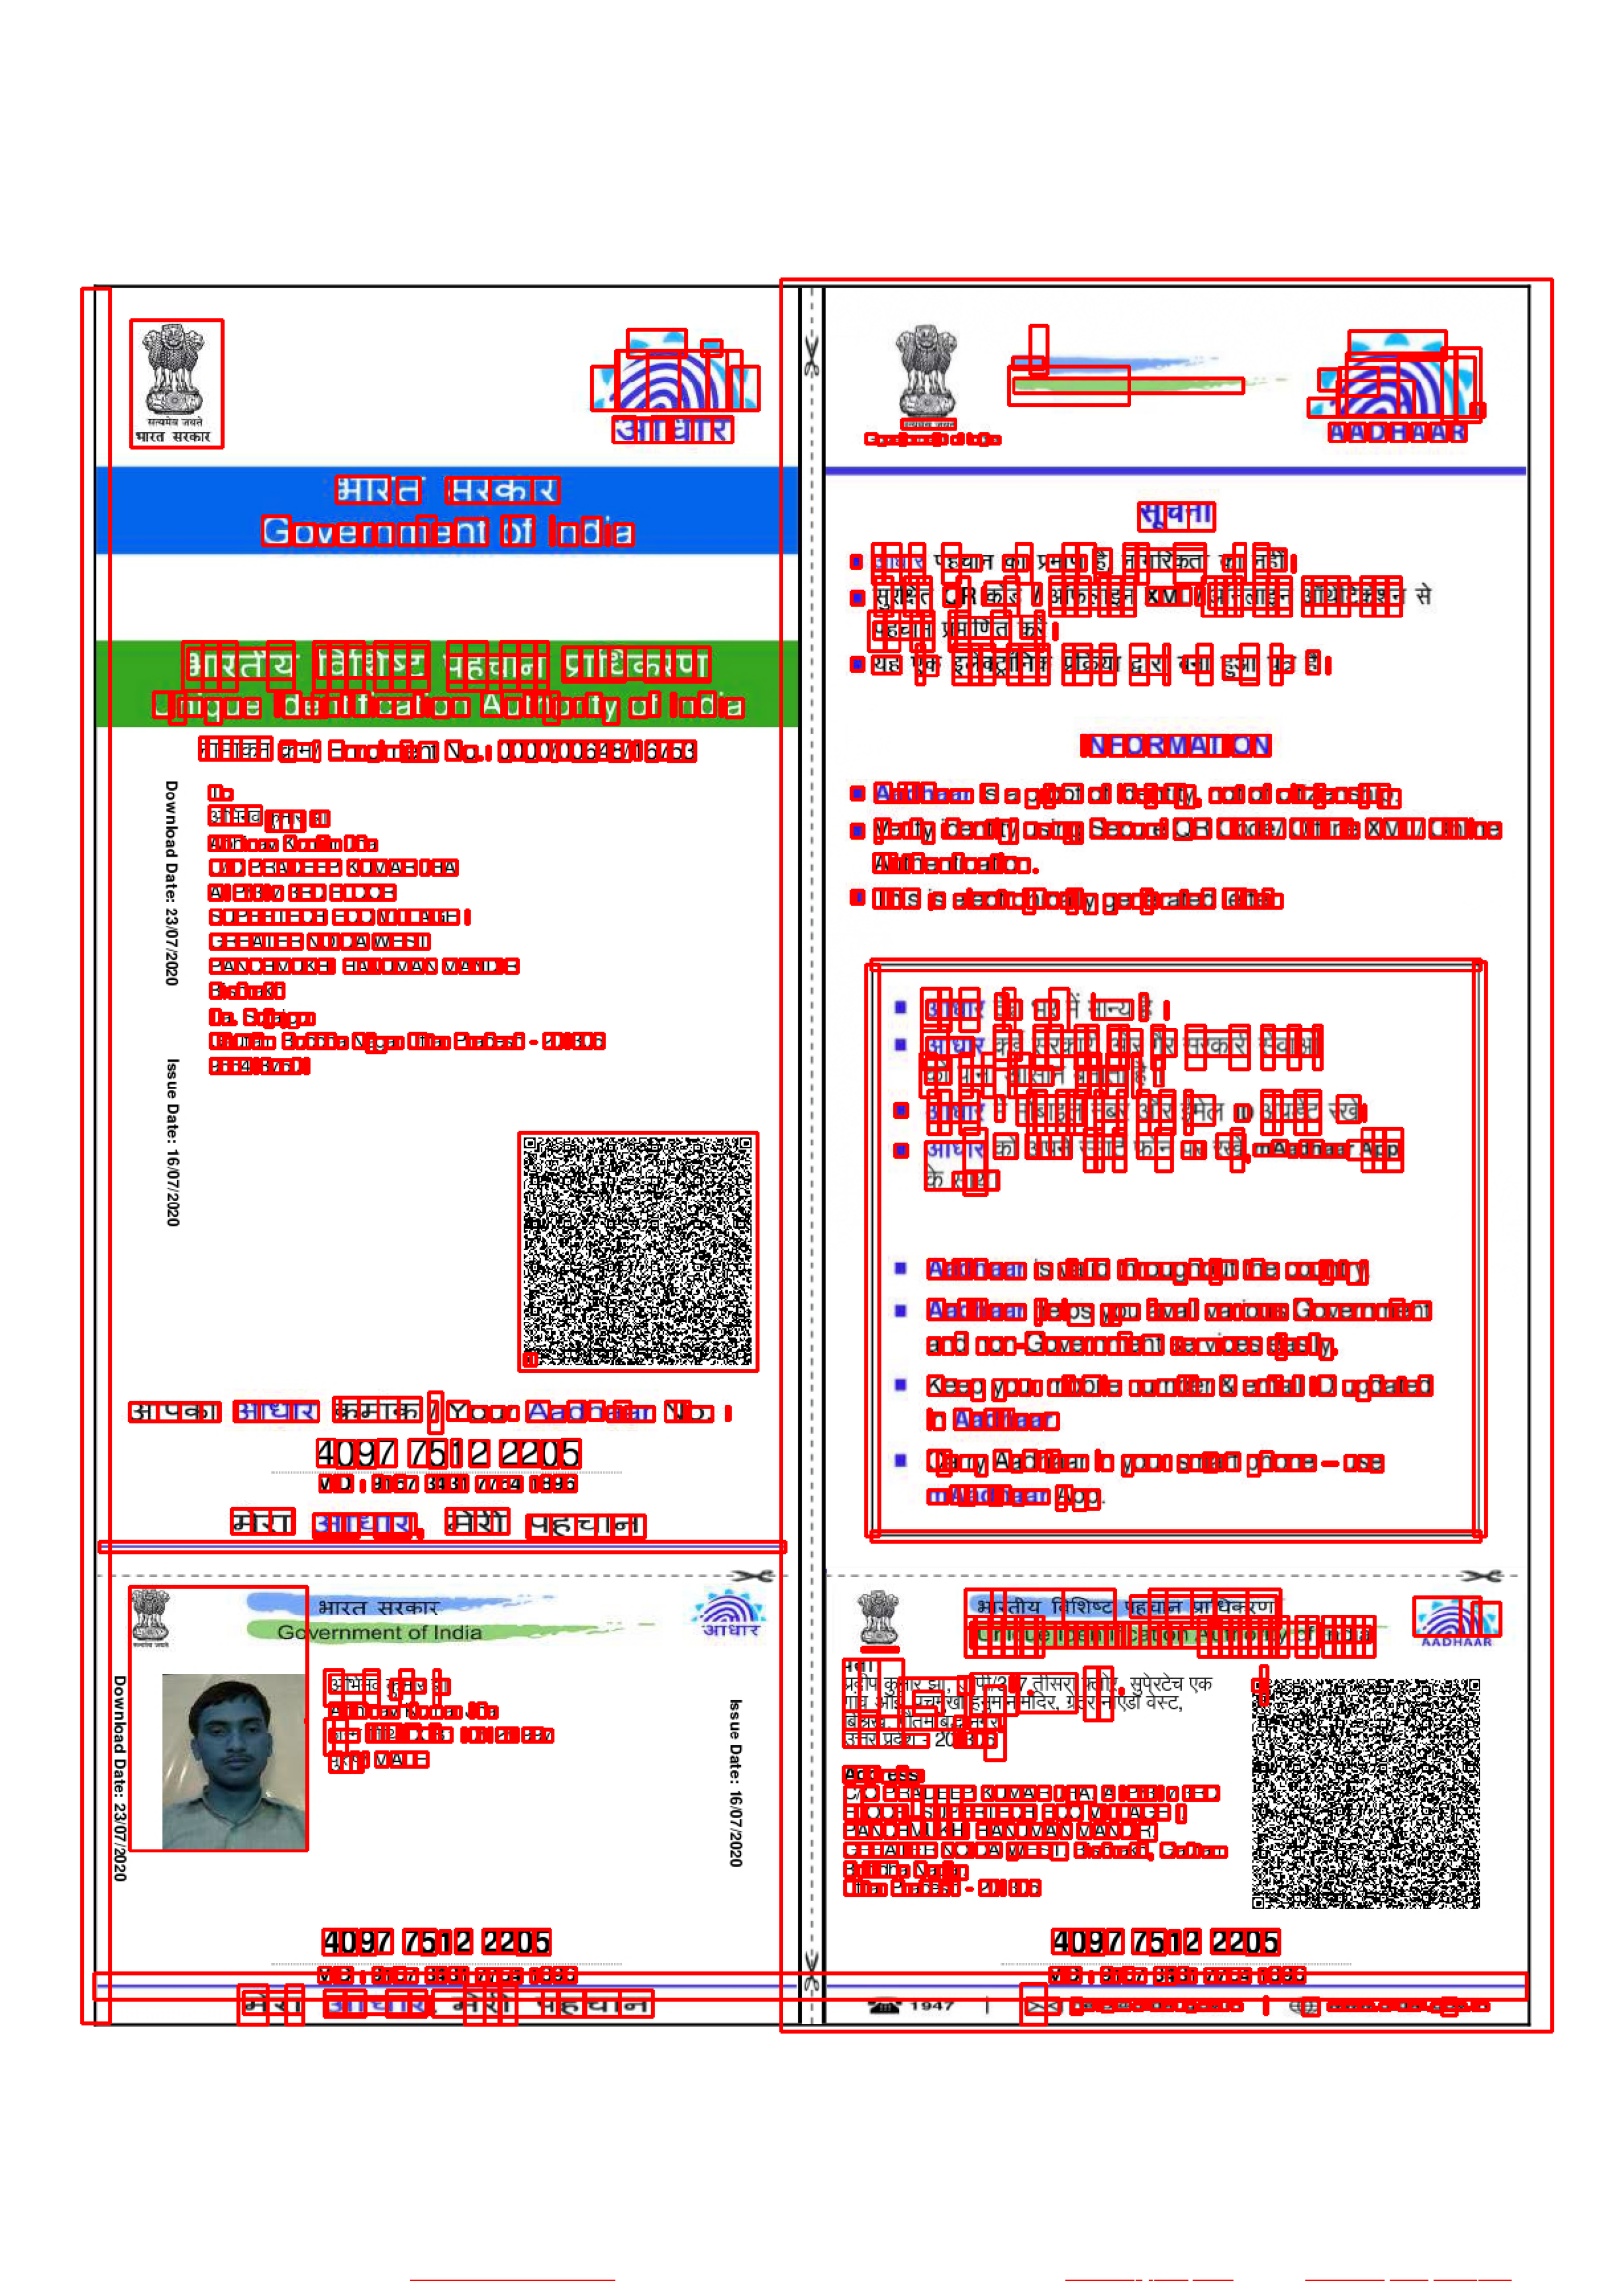

In [3]:
#  get characters and correspongding position
ocr_out = pytesseract.image_to_boxes(image_file)
# print(ocr_out)

#  plot position of each character detectedon the image
img = cv2.imread(image_path)
h, w, _ = img.shape
for bbox in ocr_out.split('\n'):
    try:
#         print(bbox)
        split = bbox.split(' ')
        text = split[0]
    #     print(len(split))
        point1 = (int(split[1]), h - int(split[2]))
        point2 = (int(split[3]), h -int(split[4]))
        img = cv2.rectangle(img,point1,point2,(255,0,0),2)
    except:
        pass
plt.figure(figsize=(24,30))
plt.imshow(img)
plt.axis('off')

# Finding Centre of (X,Y)Coordinates

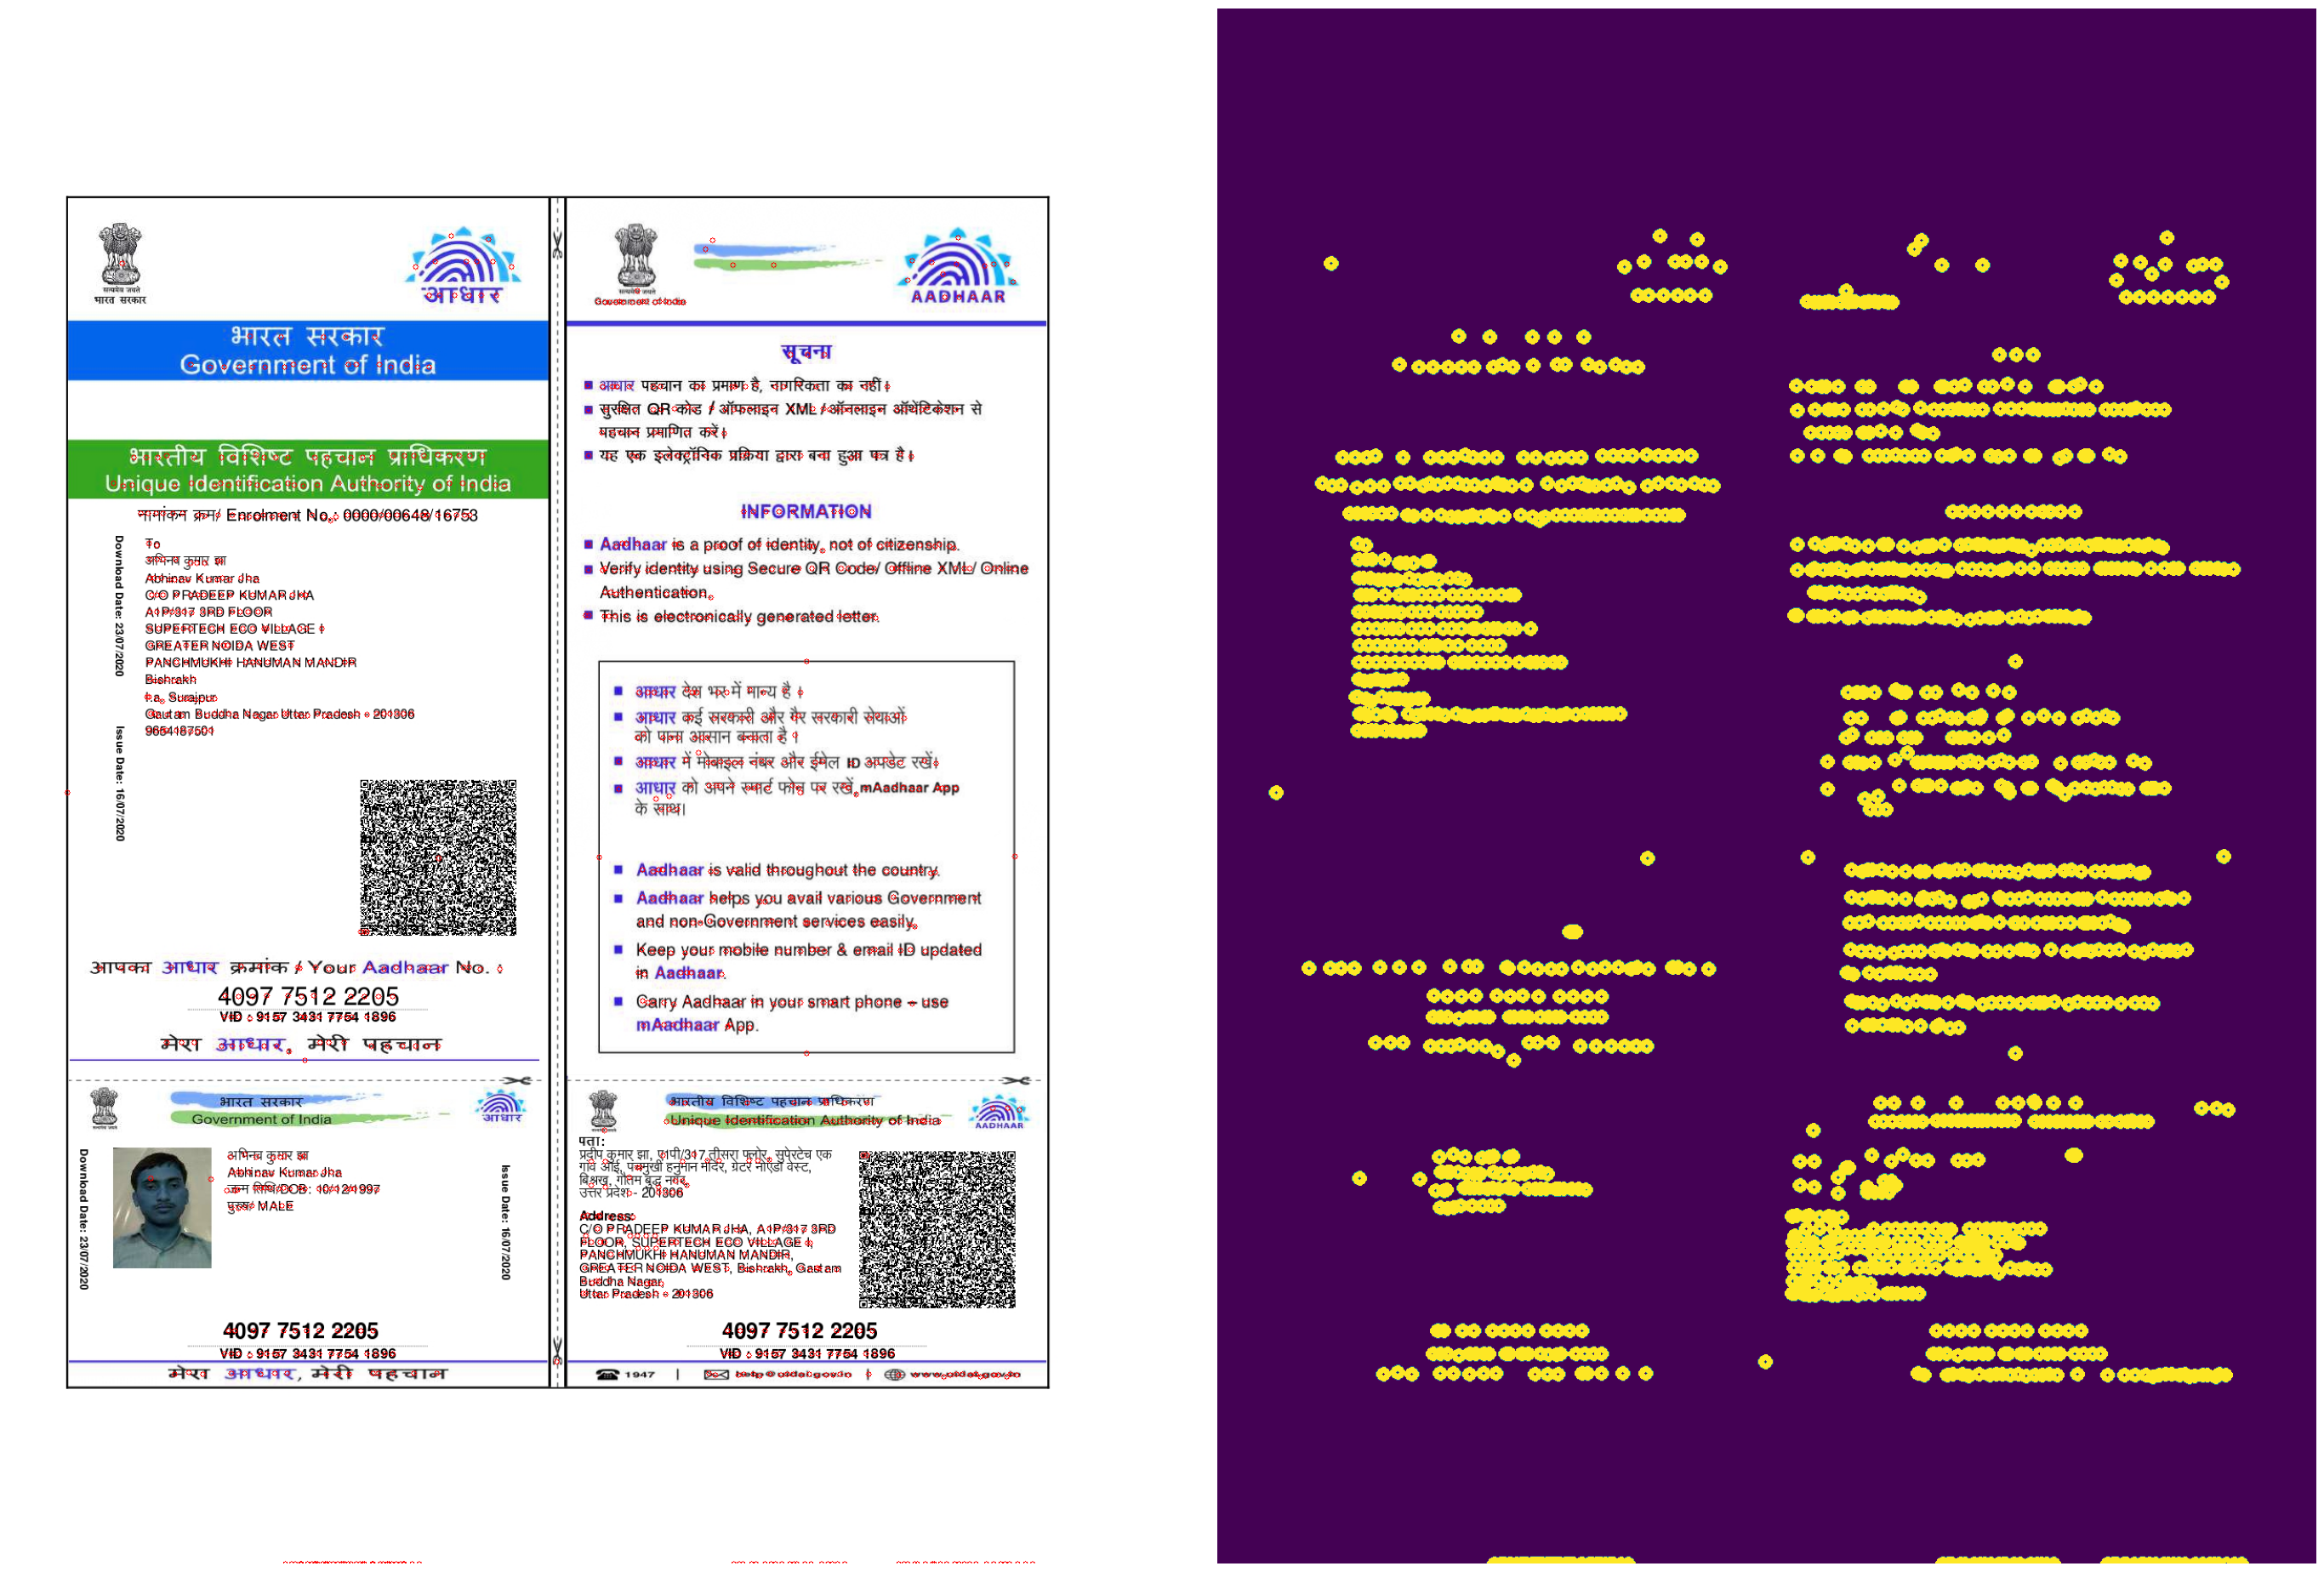

In [4]:
fig = plt.figure(figsize=(35,30))

plt.tight_layout()
plt.subplots_adjust(top=0.95, wspace=0.1, hspace=0)

points = []
for bbox in ocr_out.split('\n'):
    try:
        split = bbox.split(' ')
        text = split[0]
        point1 = (int(split[3]) + int(split[1])) / 2
        point2 =  (h -  int(split[4]) + h - int(split[2]))/2
        points.append([point1,point2])
    except:
        pass

img = cv2.imread(image_path)
white = np.zeros((h,w))
for point in points:
    x = int(point[0])
    y = int(point[1])
    img = cv2.circle(img, (x,y) , 3, (255,0,0))
    white = cv2.circle(white, (x,y) , 5, (255,255,255), 6)

plt.subplot(1,2,1)
#plt.title()
plt.imshow(img)
plt.axis('off')    

plt.subplot(1,2,2)
plt.imshow(white)
plt.axis('off')

plt.show()

# Applying DBSCAN
It is used because

* Number of clusters is not fixed as per problem statement
* It is robust with outliers
* blocks of text can be categorized on basis of density of text occurrence

## Hyperparameters
* **eps**: euclidean distance metric for creating the radius of the circle
* **min_samples**: minimum samples to be present to form an independent cluster

In [5]:
points_vector = points
points_vector = np.array(points_vector)
print("Shape of points vector  ",points_vector.shape)
print("Number of dimensions of points vector ",points_vector.ndim)

Shape of points vector   (1493, 2)
Number of dimensions of points vector  2


In [6]:
clustering = DBSCAN(eps=45, min_samples=5).fit_predict(points)

In [7]:
# Just for nice plotting: get a color for each cluster 
dico_color = {}
for i in range(np.max(clustering)+1):
    dico_color[i] = (random.randint(0,255),random.randint(0,255),random.randint(0,255))

# Updating the coordinates

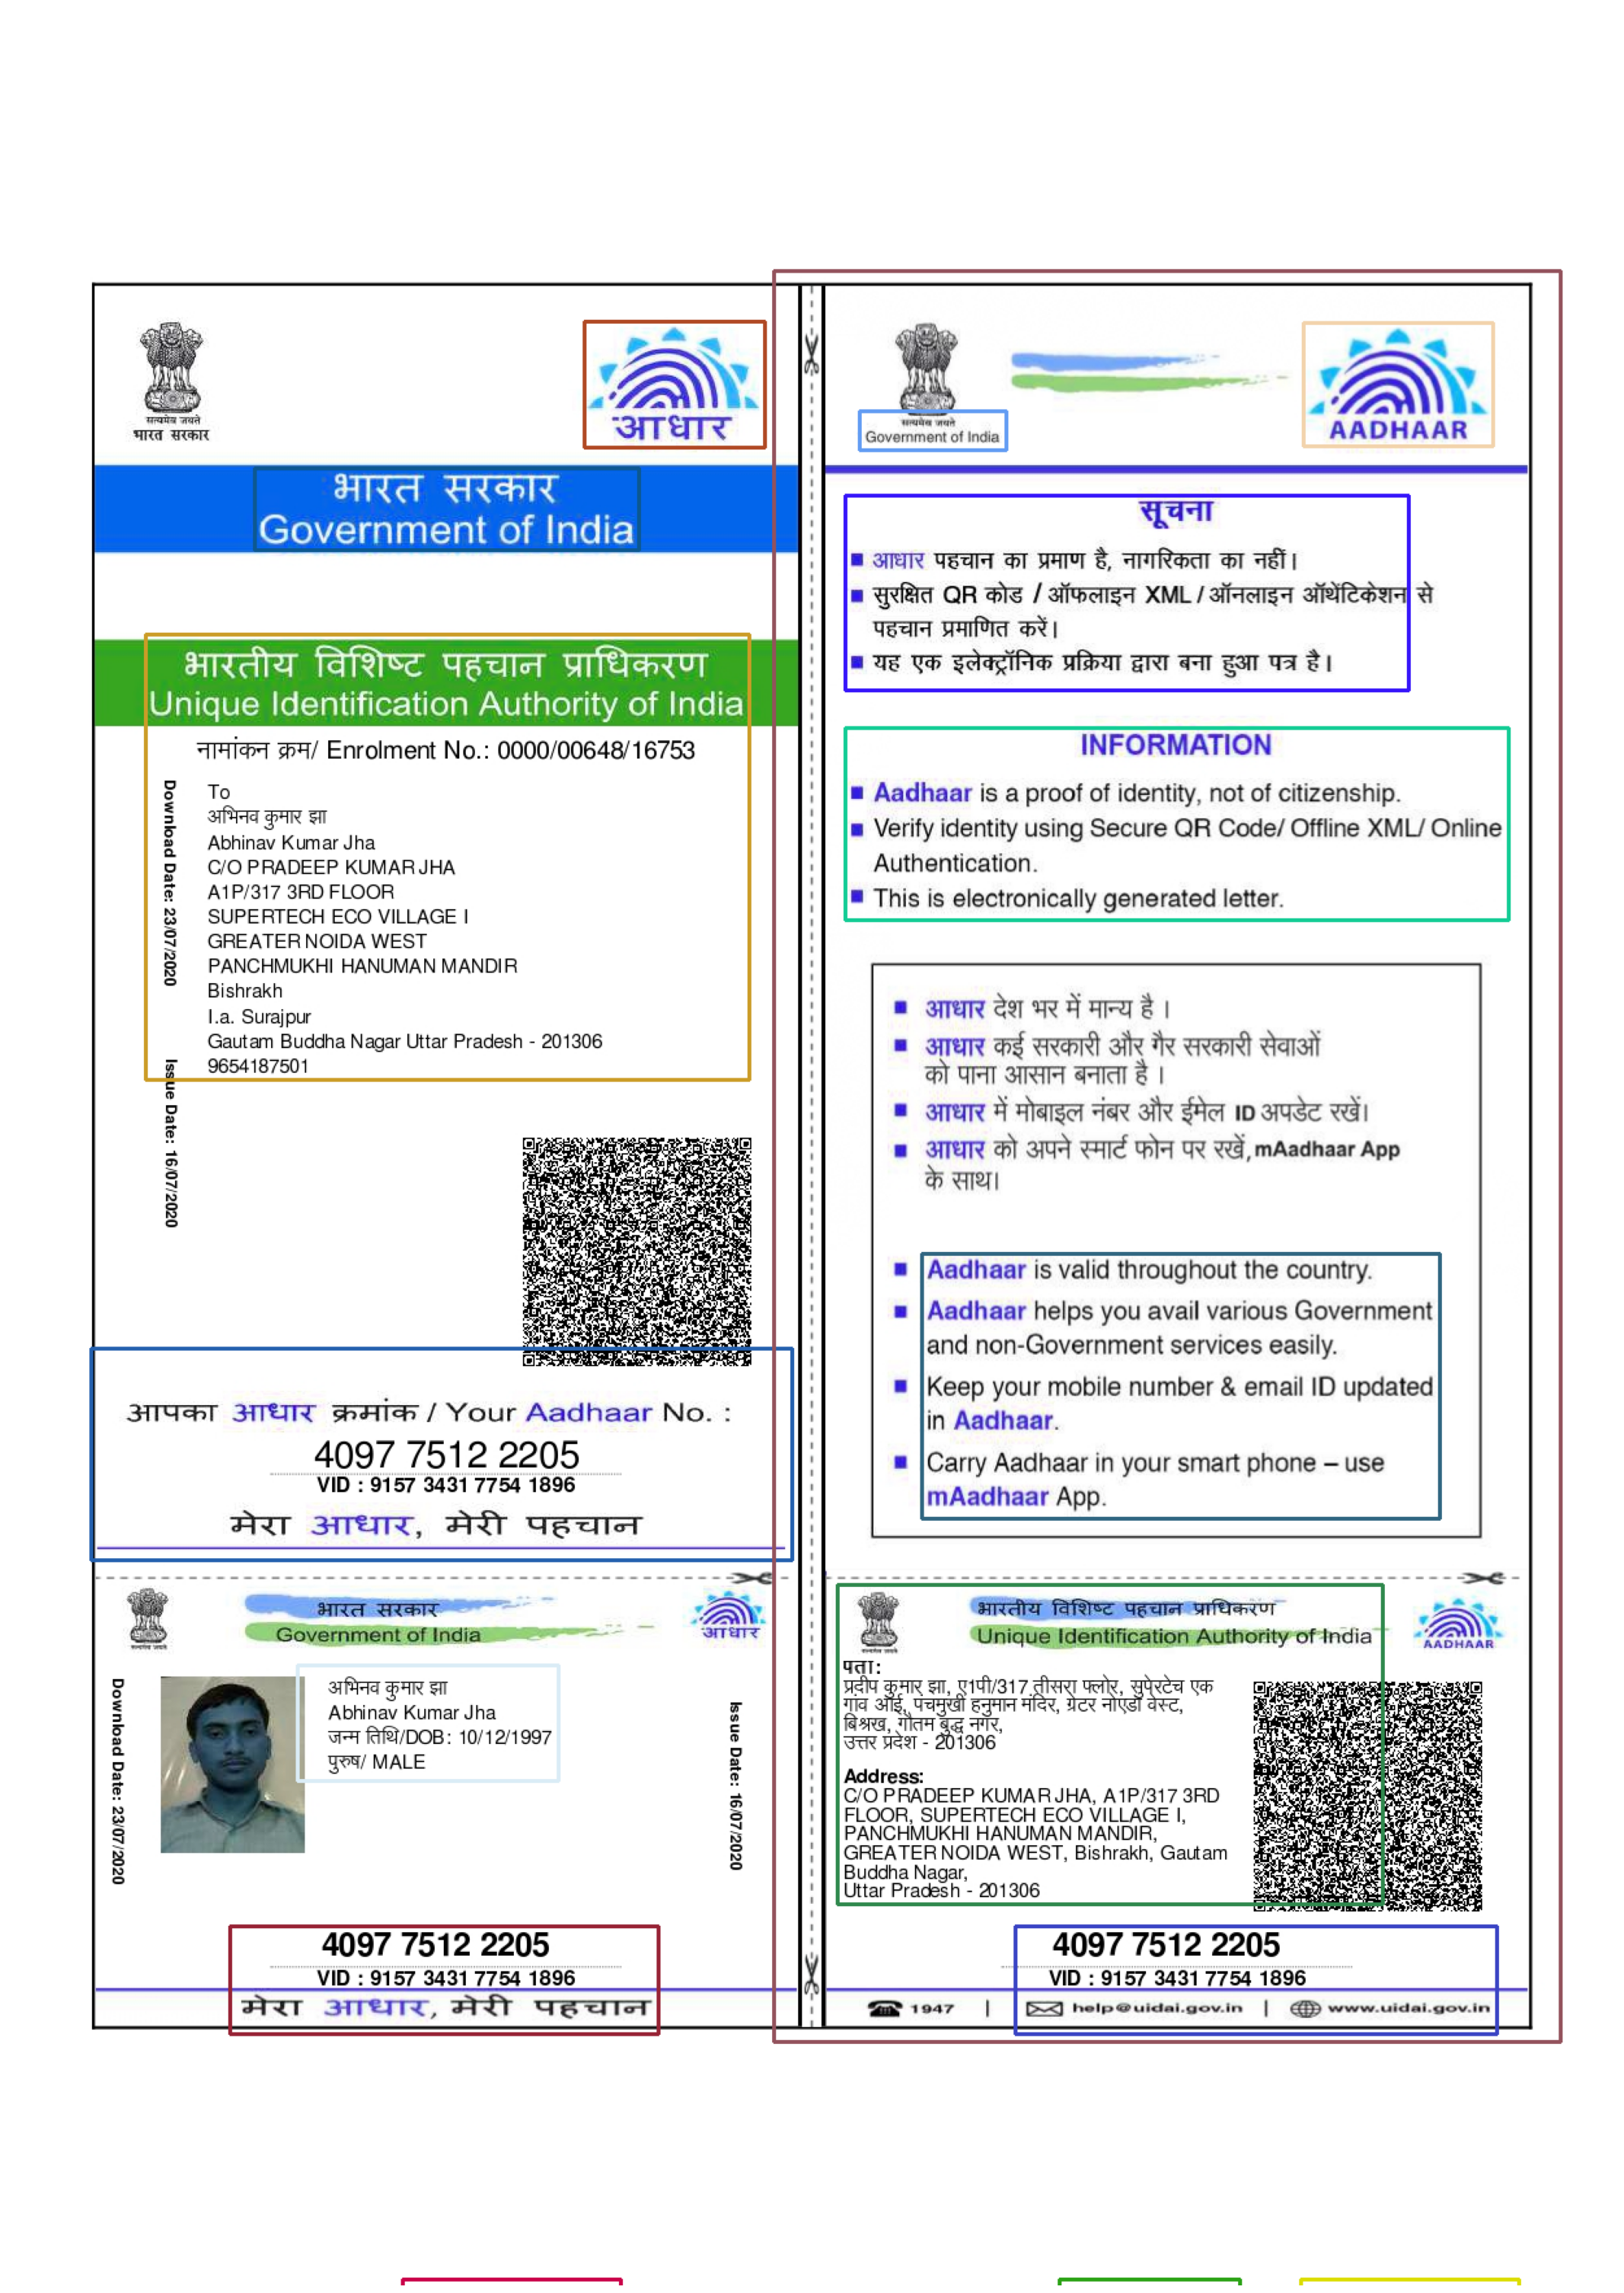

In [8]:
# Plot clusters
plt.figure(figsize=(60,80))
img = cv2.imread(image_path)
h, w, _ = img.shape
# print(clustering)
# plot a rectangle around each character with the color of the cluster
for en,bbox in enumerate(ocr_out.split('\n')):
    try:
        split = bbox.split(' ')
        text = split[0]
        bottom_left = (int(split[1]), h - int(split[2]))
        top_right = (int(split[3]), h -  int(split[4]))
        if clustering[en] != -1:
            img = cv2.rectangle(img, bottom_left, top_right, dico_color[clustering[en]], 2)
    except:
        pass
# plt.subplot(1,2,1)
# plt.imshow(img)
# plt.axis('off')

#  plot a rectangle around each cluster 
img = cv2.imread(image_path)
dico_area_location = {} #  store location of each cluster for the following
for i in range(np.max(clustering)+1):
    wh = np.where(clustering==i) #  select points from cluster i
    arr = np.array(ocr_out.split('\n'))[wh]
    LX,LY = [], []
    for en,bbox in enumerate(arr):
        try:
            split = bbox.split(' ')       
            LX.append(int(split[1]))
            LX.append(int(split[3]))   
            LY.append( h - int(split[2]))
            LY.append( h - int(split[4]))
        except:
            pass
    bottom_left = (min(LX)-5,min(LY)-5) # among every character in the cluster, take min(x), min(y)
    top_right = (max(LX)+5,max(LY)+5) # among every character in the cluster, take max(x), max(y)
    dico_area_location[i] = [bottom_left, top_right]

    img = cv2.rectangle(img, bottom_left, top_right, dico_color[i], 2) # draw a rectangle containing 
    #  every character in the cluster  
del dico_area_location[13]
plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
plt.show()

In [9]:
CONTINENTS_PATH = "./location_data/continents.txt" 
COUNTRIES_PATH = "./location_data/countries.txt"
CITIES_PATH = "./location_data/total_cities.txt"
STATES_PATH = "./location_data/total_states.txt"

continents_list = [w.lower().strip() for w in open(CONTINENTS_PATH, "r").readlines()]
countries_list = [w.lower().strip() for w in open(COUNTRIES_PATH, "r").readlines()]
cities_list = [w.lower().strip() for w in open(CITIES_PATH, "r").readlines()]
states_list = [w.lower().strip() for w in open(STATES_PATH, "r").readlines()]

def isAddress(text):
    score=0
    new_list = list()
    text_list = text.split("\n")
    for text in text_list:
        lis = text.split(" ")
        new_list.extend(lis)
    for i in range(len(new_list)):
        new_list[i] = new_list[i].strip()
    text_list = new_list
    
    for text_token in text_list:
        text_token = text_token.lower()
        if len(text_token)<2:
            continue
        if text_token in continents_list:
            score+=10
        if text_token in countries_list:
            score+=10
        if text_token in cities_list:
            score+=10
        if text_token in states_list:
            score+=10
        
    if score>0 and len(text_list)>10:
#         print("Score obtained ",score)
        return True
    return False

In [10]:
from fuzzywuzzy import fuzz
def findCountry(text,fieldname,threshold_value):
    new_list = list()
    text_list = text.split("\n")
    for text in text_list:
        lis = text.split(" ")
        new_list.extend(lis)
    for i in range(len(new_list)):
        new_list[i] = new_list[i].strip()
    text_list = new_list
    ind = 0
    for i in range(len(text_list)):
        word = text_list[i]
        if fuzz.partial_ratio(word,fieldname)>threshold_value:
            ind = i
            break
    for i in range(ind,len(text_list)):
        text_token = text_list[i]
        text_token = text_token.lower()
        if text_token in countries_list:
            return text_token
    return "None"


/Users/abhjha8/ml_projects/venv/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# Extracting Text from Blocks
It includes following steps

1. Cropping the regions of the blocks identified
2. Doing ocr separately on those blocks (region of image)

Cluster 1


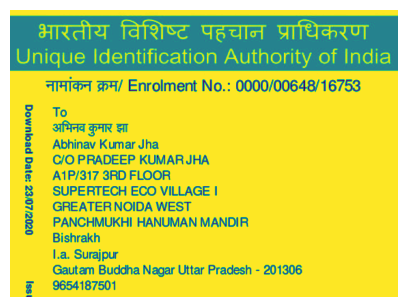

Cluster 15


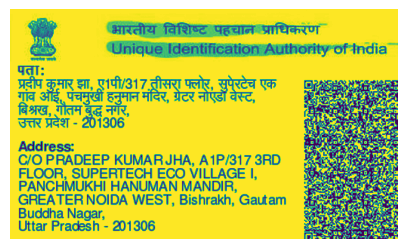

In [11]:
img = cv2.imread(image_path) 
to_pop_list = []
min_text_length = 20
for cluster in dico_area_location:
    try:
        [bottom_left, top_right] = dico_area_location[cluster]
        pad = 4 #  add some pixels around cluster area
        img_crop = img[ bottom_left[1] - pad :top_right[1] + pad, bottom_left[0] - pad:top_right[0] + pad , :]
        # The cropped image can have weird shape and tesseract OCR is more accurate if we transform the cropped image as followed
        img_crop = cv2.resize(img_crop, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_CUBIC) 
        img_crop = cv2.cvtColor(img_crop, cv2.COLOR_BGR2GRAY)
        # Run tesseract on the cropped image
        text = pytesseract.image_to_string(img_crop)
        if len(text)>=min_text_length and isAddress(text): 
            print('Cluster {}'.format(cluster))
            plt.figure(figsize=(5,5))
            plt.imshow(img_crop)
            plt.axis('off')
            plt.show()
#             print('text extracted: \n', text)
#             print()
            dico_area_location[cluster].append(text)
        else:
            to_pop_list.append(cluster)
    except:
        pass
# Remove area without text        
for i in to_pop_list:
    dico_area_location.pop(i)

# Ensure no key is skipped due to removal
dico_area_location_copy = {}
for en, key in enumerate(dico_area_location):
    dico_area_location_copy[en] = dico_area_location[key]
dico_area_location = dico_area_location_copy 